# Exercises week 36

## 1a:
![title](img/week36_1a.jpg)

## 1b:
![title](img/week36_1b.jpg)

## 2:

Training: OLS MSE degree =  5 :  7.254690788872434e-16
Test: OLS MSE degree =  5 :  1.0692478479201418e-15 

Training: RR MSE degree =  5 Lambda =  0.0001 :  1.2604681443570785e-08
Test: RR MSE degree =  5 :  0.0001 :  3.494326973824977e-08 

Training: RR MSE degree =  5 Lambda =  0.001 :  2.743603912889195e-07
Test: RR MSE degree =  5 :  0.001 :  1.625995247887739e-06 

Training: RR MSE degree =  5 Lambda =  0.01 :  5.306773797379484e-06
Test: RR MSE degree =  5 :  0.01 :  2.2397299192388176e-05 

Training: RR MSE degree =  5 Lambda =  0.1 :  7.55828229570286e-05
Test: RR MSE degree =  5 :  0.1 :  0.00011292522757889293 

Training: RR MSE degree =  5 Lambda =  1.0 :  0.0014010595873586353
Test: RR MSE degree =  5 :  1.0 :  0.0023880308710923985 



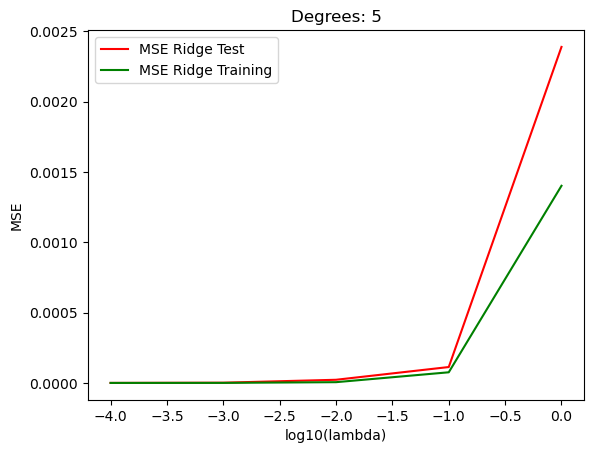

Training: OLS MSE degree =  10 :  0.1100117675981244
Test: OLS MSE degree =  10 :  0.09792684401475572 

Training: RR MSE degree =  10 Lambda =  0.0001 :  3.130801018801768e-08
Test: RR MSE degree =  10 :  0.0001 :  1.8910618249101466e-06 

Training: RR MSE degree =  10 Lambda =  0.001 :  4.6654848962753805e-07
Test: RR MSE degree =  10 :  0.001 :  2.7256793787016835e-05 

Training: RR MSE degree =  10 Lambda =  0.01 :  5.284174230369623e-06
Test: RR MSE degree =  10 :  0.01 :  1.1291951488201902e-05 

Training: RR MSE degree =  10 Lambda =  0.1 :  9.614238947619263e-05
Test: RR MSE degree =  10 :  0.1 :  0.00022425128326592422 

Training: RR MSE degree =  10 Lambda =  1.0 :  0.0007861416591427222
Test: RR MSE degree =  10 :  1.0 :  0.000978067829539165 



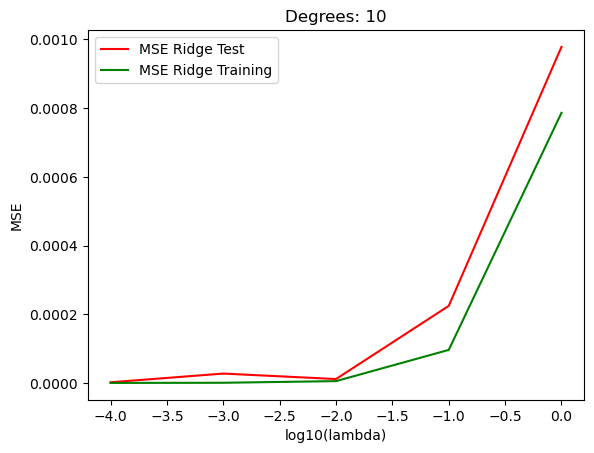

Training: OLS MSE degree =  15 :  47137.310077733244
Test: OLS MSE degree =  15 :  8613945.454784142 

Training: RR MSE degree =  15 Lambda =  0.0001 :  1.735733742194571e-05
Test: RR MSE degree =  15 :  0.0001 :  0.01734974753745425 

Training: RR MSE degree =  15 Lambda =  0.001 :  8.194925429080718e-07
Test: RR MSE degree =  15 :  0.001 :  0.00036822959775952973 

Training: RR MSE degree =  15 Lambda =  0.01 :  6.440601975167096e-06
Test: RR MSE degree =  15 :  0.01 :  0.0055811384282324975 

Training: RR MSE degree =  15 Lambda =  0.1 :  7.812508409043622e-05
Test: RR MSE degree =  15 :  0.1 :  0.0005899748412686754 

Training: RR MSE degree =  15 Lambda =  1.0 :  0.0008040436618441032
Test: RR MSE degree =  15 :  1.0 :  0.20533396726734962 



/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=4.19966e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.71155e-19): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.139e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)
/opt/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:253: LinAlgWarning: Ill-conditioned matrix (rcond=3.0122e-17): result may not be accurate.
  dual_coef = linalg.solve(K, y, assume_a="pos", overwrite_a=False)


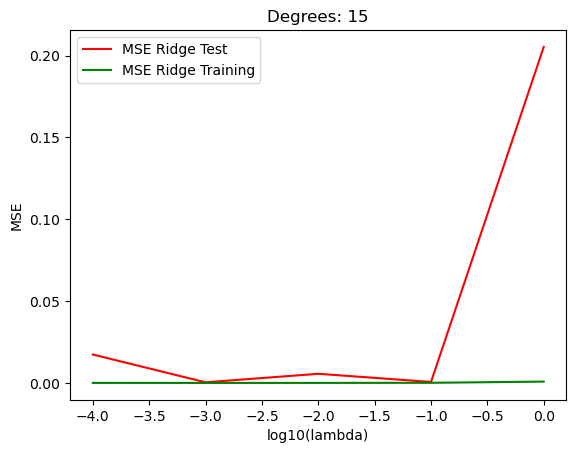

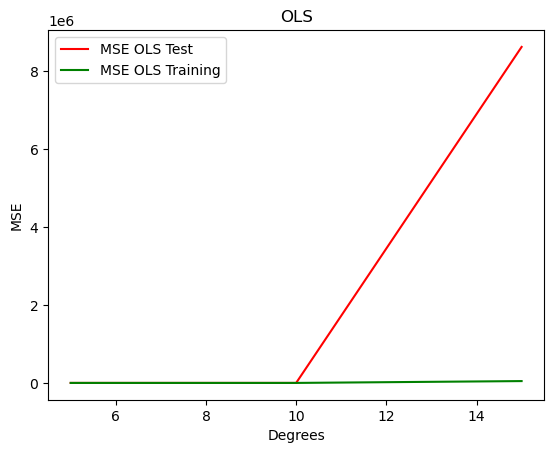

In [49]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn import linear_model

# Make data set
np.random.seed()
n = 100

x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

def CreateFeatureMatrix(degree):
    data_points = np.column_stack((x, y))
    poly = PolynomialFeatures(degree, include_bias=False)

    poly_features = poly.fit_transform(data_points)

    return poly_features

def OrdinaryLeastSquaresMSE(featureMatrix):
    X_train, X_test, y_train, y_test = train_test_split(featureMatrix, y, test_size=0.2)

    beta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
    # and then make the prediction
    ytilde = X_train @ beta
    ypredict = X_test @ beta

    mse_training = error.mean_squared_error(y_train, ytilde)
    mse_test = error.mean_squared_error(y_test, ypredict)

    return (mse_training, mse_test)

def RidgeRegressionMSE(featureMatrix, lmb):
    X_train, X_test, y_train, y_test = train_test_split(featureMatrix, y, test_size=0.2)

    #From lecture notes:
    RegRidge = linear_model.Ridge(lmb, fit_intercept=False)
    RegRidge.fit(X_train,y_train)

    ytildeRidge = RegRidge.predict(X_train)
    ypredictRidge = RegRidge.predict(X_test)

    mse_training = error.mean_squared_error(y_train, ytildeRidge)
    mse_test = error.mean_squared_error(y_test, ypredictRidge)

    return (mse_training, mse_test)


degrees = (5, 10, 15)
mses_ols_training = []
mses_ols_test = []
for degree in degrees:
    X = CreateFeatureMatrix(degree)

    #OLS
    ols_mse_training, ols_mse_test = OrdinaryLeastSquaresMSE(X)
    mses_ols_test.append(ols_mse_test)
    mses_ols_training.append(ols_mse_training)

    print("Training: OLS MSE degree = ", degree, ": ", ols_mse_training)
    print("Test: OLS MSE degree = ", degree, ": ", ols_mse_test, "\n")

    #Ridge
    lambdas = (0.0001, 0.001, 0.01, 0.1, 1.0)
    trainingMSEs_ridge = []
    testMSEs_ridge = []
    for lmb in lambdas:
        rr_mse_training, rr_mse_test = RidgeRegressionMSE(X, lmb)
        trainingMSEs_ridge.append(rr_mse_training)
        testMSEs_ridge.append(rr_mse_test)

        print("Training: RR MSE degree = ", degree, "Lambda = ", lmb, ": ", rr_mse_training)
        print("Test: RR MSE degree = ", degree, ": ", lmb, ": ", rr_mse_test, "\n")

    # Ridge plots
    plt.figure()
    plt.title("Degrees: " + str(degree))
    plt.plot(np.log10(lambdas), testMSEs_ridge, 'r', label = 'MSE Ridge Test')
    plt.plot(np.log10(lambdas), trainingMSEs_ridge, 'g', label = 'MSE Ridge Training')

    plt.xlabel('log10(lambda)')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()

#OLS plot
plt.figure()
plt.title("OLS")
plt.plot(degrees, mses_ols_test, 'r', label = 'MSE OLS Test')
plt.plot(degrees, mses_ols_training, 'g', label = 'MSE OLS Training')

plt.xlabel('Degrees')
plt.ylabel('MSE')
plt.legend()
plt.show()




The plots show that for higher order polynomials, the ridge regression test model deviates greatly from the training model for high lambdas, while this effect is less noticeable for the lower order polynomial. 

For ordinary least squares, mse blows up for higher order polynomials